### Sentiment analysis 

In [1]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dragos/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# train = pd.read_csv("train.csv")
# val = pd.read_csv("val.csv")
test = pd.read_csv("test.csv")
# train["review_length"].describe()

In [4]:
def determine_sentiment(text):
    """
    This function determines the sentiment of a string (in this case a speech)
    :param data: the speech / a string
    :return:
    """
    if len(text.split()) < 266:
        sia = SentimentIntensityAnalyzer()
        sentiment = sia.polarity_scores(text)['compound']
    else:    
        sentiment = 0
        
    return sentiment

In [86]:
determine_sentiment("This sounds awesome.")
# determine_sentiment("This is the best book ever.")

0.6249

In [88]:
# df = train.head(10)
# df
# df["sa"] = df['review_text'].apply(lambda review: determine_sentiment(review))

In [21]:
x = test[["review_id", "review_text"]]
x['sa'] = 4

<ipython-input-21-cb00d0e8fa14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sa'] = 4


In [22]:
par = round(len(test)/100)
for i in range(0,100):
    a = i*par
    b = (i+1)*par
    x.iloc[a:b,2] = x.iloc[a:b,1].apply(lambda review: determine_sentiment(review))
    print(i, "%")

/Users/dragos/anaconda3/envs/lgbm/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0 %
1 %
2 %
3 %
4 %
5 %
6 %
7 %
8 %
9 %
10 %
11 %
12 %
13 %
14 %
15 %
16 %
17 %
18 %
19 %
20 %
21 %
22 %
23 %
24 %
25 %
26 %
27 %
28 %
29 %
30 %
31 %
32 %
33 %
34 %
35 %
36 %
37 %
38 %
39 %
40 %
41 %
42 %
43 %
44 %
45 %
46 %
47 %
48 %
49 %
50 %
51 %
52 %
53 %
54 %
55 %
56 %
57 %
58 %
59 %
60 %
61 %
62 %
63 %
64 %
65 %
66 %
67 %
68 %
69 %
70 %
71 %
72 %
73 %
74 %
75 %
76 %
77 %
78 %
79 %
80 %
81 %
82 %
83 %
84 %
85 %
86 %
87 %
88 %
89 %
90 %
91 %
92 %
93 %
94 %
95 %
96 %
97 %
98 %
99 %


In [ ]:
##################

In [31]:
l = x[x['sa']==4]["review_text"].apply(lambda review: determine_sentiment(review))

In [46]:
x.loc[478000:,'sa'] = l

/Users/dragos/anaconda3/envs/lgbm/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [47]:
x

,review_id,review_text,sa
0,5c4df7e70e9b438c761f07a4620ccb7c,** spoiler alert ** \n This is definitely one ...,0.0000
1,8eaeaf13213eeb16ad879a2a2591bbe5,"** spoiler alert ** \n ""You are what you drink...",0.0000
2,dce649b733c153ba5363a0413cac988f,Roar is one of my favorite characters in Under...,-0.7326
3,8a46df0bb997269d6834f9437a4b0a77,** spoiler alert ** \n If you feel like travel...,0.9442
4,d11d3091e22f1cf3cb865598de197599,3.5 stars \n I read and enjoyed the first two ...,0.0000
...,...,...,...
478028,0e1db3d4b04256f9660f5d276ddf1314,Can't wait for Travis' POV \n Travis Before Ab...,0.0000
478029,0b7f352e58caf0fd1f961e98ef04e89c,Had this on my to-read shelf forever. Will upd...,0.0000
478030,9b19eff33ddb14e9e68fca2e90379e46,The last book left me wanting for more. I need...,0.6417
478031,8be463fed78f0da63e964706f710332b,Things are heating up in the second novel of I...,0.9436


In [48]:
x['sa']

0         0.0000
1         0.0000
2        -0.7326
3         0.9442
4         0.0000
           ...  
478028    0.0000
478029    0.0000
478030    0.6417
478031    0.9436
478032    0.0000
Name: sa, Length: 478033, dtype: float64

In [49]:
# verify how many entries are 4 before normalizing
len(x[x['sa']==4])

0

In [50]:
y = x

In [51]:
###########

In [53]:
from sklearn import preprocessing

v = y["sa"].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
v_scaled = min_max_scaler.fit_transform(v.reshape(-1,1))
# df = pd.DataFrame(x_scaled)

In [54]:
v_scaled

array([[0.49992498],
       [0.49992498],
       [0.13353338],
       ...,
       [0.82085521],
       [0.97184296],
       [0.49992498]])

In [60]:
# check for negative values
import numpy as np
np.sum(v_scaled < 0)

0

In [61]:
len(v)

478033

In [62]:
v_scaled*5

array([[2.49962491],
       [2.49962491],
       [0.66766692],
       ...,
       [4.10427607],
       [4.8592148 ],
       [2.49962491]])

In [64]:
np.round(v_scaled*5)

array([[2.],
       [2.],
       [1.],
       ...,
       [4.],
       [5.],
       [2.]])

In [69]:
r = np.round(v_scaled*5).reshape(-1)

In [71]:
len(r)

478033

In [72]:
# submission

In [74]:
ids = x['review_id'].values

In [75]:
ids

array(['5c4df7e70e9b438c761f07a4620ccb7c',
       '8eaeaf13213eeb16ad879a2a2591bbe5',
       'dce649b733c153ba5363a0413cac988f', ...,
       '9b19eff33ddb14e9e68fca2e90379e46',
       '8be463fed78f0da63e964706f710332b',
       '62ed1263c7d216986cc419cd4e8a408b'], dtype=object)

In [76]:
r

array([2., 2., 1., ..., 4., 5., 2.])

In [77]:
c = pd.DataFrame({'review_id':ids, 'rating':r})

In [79]:
c['rating'] = c['rating'].astype(int)

In [81]:
c['rating'].describe()

count    478033.000000
mean          3.338412
std           1.542808
min           0.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

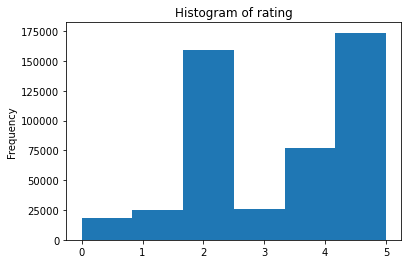

In [85]:
c['rating'].plot.hist(bins=6, title="Histogram of rating"); #distribution does not match -> expect the score to be worse

In [86]:
c

,review_id,rating
0,5c4df7e70e9b438c761f07a4620ccb7c,2
1,8eaeaf13213eeb16ad879a2a2591bbe5,2
2,dce649b733c153ba5363a0413cac988f,1
3,8a46df0bb997269d6834f9437a4b0a77,5
4,d11d3091e22f1cf3cb865598de197599,2
...,...,...
478028,0e1db3d4b04256f9660f5d276ddf1314,2
478029,0b7f352e58caf0fd1f961e98ef04e89c,2
478030,9b19eff33ddb14e9e68fca2e90379e46,4
478031,8be463fed78f0da63e964706f710332b,5


In [87]:
c.to_csv("sub8.csv", index=False)

In [44]:
len(val)

90000

In [45]:
val["sa"] = val['review_text'].apply(lambda review: determine_sentiment(review))

In [ ]:
# takes too long to compute the feature for the entire training set

In [ ]:
test.head()

In [ ]:
train = train.drop(['review_text'], axis = 1)
test = test.drop(['review_text'], axis = 1)
val = val.drop(['review_text'], axis = 1)

In [ ]:
wandb.login()

In [ ]:
PROJECT_NAME = "Goodreads Books Reviews"
ENTITY = 'd-a-pop'

In [ ]:
run = wandb.init(project=PROJECT_NAME, entity=ENTITY, job_type="upload")

In [ ]:
artifact = wandb.Artifact("Data_processed2", type="dataset")

In [ ]:
t_train2 = wandb.Table(dataframe=train)
t_val2 = wandb.Table(dataframe=val)
t_test2 = wandb.Table(dataframe=test)

In [ ]:
artifact.add(t_train1, "t_train2")
artifact.add(t_val1, "t_val2")
artifact.add(t_test1, "t_test2")

In [ ]:
run.log_artifact(artifact)
run.finish()

In [ ]:
train.to_csv("train.csv", index = False)
val.to_csv("val.csv", index=False)
test.to_csv("test.csv", index=False)